# 당뇨와 고혈압 질병 예측
- BTH_G : 연령(그룹)
- SBP : 수축기혈압
- DBP : 이완기혈압
- FBS : 공복혈당
- SEX : 성별(남성:1, 여성:2)
- DIS : 고혈압/당뇨병 진료여부
  - 고혈압/당뇨병 진료내역 있음: 1
  - 고혈압 진료내역 있음: 2
  - 당뇨병 진료내역 있음: 3
  - 고혈압/당뇨병 진료내역 없음: 4
- BMI : 체질량지수

# 데이터 재가공

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

## 데이터 불러오기

In [3]:
import os

# 다운로드 받은 파일을 판다스의 read_csv 를 통해 읽어옵니다.
# 파일을 읽어온 후 shape 로 행과 열의 수를 출력합니다.
# csv_path = '/content/drive/MyDrive/health/data/data_2.csv'
csv_path = '/content/drive/MyDrive/아이펠해커톤_2/data_dis01.csv'
df2 = pd.read_csv(csv_path, encoding='cp949')

df = df2.copy()
pd.set_option('display.max_columns', None) # 컬럼 수가 많으므로 요약되어 표시되지 않게 합니다.
# sample, head, tail : 데이터 미리보기
df # 데이터를 확인합니다.

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI,B_pressure,B_sugar
0,0,1,116,78,94,4,16.6,0,0
1,0,1,100,60,79,4,22.3,0,0
2,0,1,100,60,87,4,21.9,0,0
3,0,1,111,70,72,4,20.2,0,0
4,0,1,120,80,98,4,20.0,0,0
...,...,...,...,...,...,...,...,...,...
999995,1,27,120,70,81,2,23.1,1,0
999996,1,27,110,70,104,2,27.2,1,0
999997,1,27,115,53,110,1,25.2,1,1
999998,1,27,120,70,90,2,19.7,1,0


In [4]:
# # dtypes를 통해 데이터 형식만 출력
# df.dtypes

# info를 통해 데이터의 크기, 형식, 메모리 사용량 등을 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   SEX         1000000 non-null  int64  
 1   BTH_G       1000000 non-null  int64  
 2   SBP         1000000 non-null  int64  
 3   DBP         1000000 non-null  int64  
 4   FBS         1000000 non-null  int64  
 5   DIS         1000000 non-null  int64  
 6   BMI         1000000 non-null  float64
 7   B_pressure  1000000 non-null  int64  
 8   B_sugar     1000000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 68.7 MB


### 결측치 확인

In [5]:
# Null 값 여부 확인
df.isnull().sum()

SEX           0
BTH_G         0
SBP           0
DBP           0
FBS           0
DIS           0
BMI           0
B_pressure    0
B_sugar       0
dtype: int64

### 기초 통계 분석

In [6]:
# 기초 통계량을 살펴봅니다.
df.describe()

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI,B_pressure,B_sugar
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.489773,13.905268,121.871763,75.787874,98.864428,3.471040,23.804029,0.259338,0.096512
std,0.499896,7.006442,14.561706,9.793411,22.981300,0.946151,3.297287,0.438272,0.295292
min,0.000000,1.000000,82.000000,50.000000,60.000000,1.000000,14.800000,0.000000,0.000000
25%,0.000000,9.000000,110.000000,70.000000,87.000000,3.000000,21.500000,0.000000,0.000000
50%,0.000000,14.000000,120.000000,76.000000,94.000000,4.000000,23.600000,0.000000,0.000000
75%,1.000000,19.000000,130.000000,80.000000,104.000000,4.000000,25.800000,1.000000,0.000000
max,1.000000,27.000000,190.000000,120.000000,358.000000,4.000000,40.300000,1.000000,1.000000


In [7]:
df.head()

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI,B_pressure,B_sugar
0,0,1,116,78,94,4,16.6,0,0
1,0,1,100,60,79,4,22.3,0,0
2,0,1,100,60,87,4,21.9,0,0
3,0,1,111,70,72,4,20.2,0,0
4,0,1,120,80,98,4,20.0,0,0


In [8]:
df.tail()

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI,B_pressure,B_sugar
999995,1,27,120,70,81,2,23.1,1,0
999996,1,27,110,70,104,2,27.2,1,0
999997,1,27,115,53,110,1,25.2,1,1
999998,1,27,120,70,90,2,19.7,1,0
999999,1,27,116,73,92,4,17.6,0,0


In [9]:
def bth_age():
  bth_dic = {
      1 : '20',
      2 : '20',
      3 : '20',
      4 : '20',
      5 : '30',
      6 : '30',
      7 : '30',
      8 : '30',
      9 : '30',
      10 : '40',
      11 : '40',
      12 : '40',
      13 : '40',
      14 : '40',
      15 : '50',
      16 : '50',
      17 : '50',
      18 : '50',
      19 : '50',
      20 : '60',
      21 : '60',
      22 : '60',
      23 : '60',
      24 : '60',
      25 : '70',
      26 : '70',
      27 : '75-'
      }
  age_list = []
  for i in range(1,28):
    age_list.append(bth_dic[i])
  return age_list

In [10]:
graph_df = df.copy()
graph_df.head()

,SEX,BTH_G,SBP,DBP,FBS,DIS,BMI,B_pressure,B_sugar
0,0,1,116,78,94,4,16.6,0,0
1,0,1,100,60,79,4,22.3,0,0
2,0,1,100,60,87,4,21.9,0,0
3,0,1,111,70,72,4,20.2,0,0
4,0,1,120,80,98,4,20.0,0,0


In [11]:
graph_df = graph_df.astype({'SEX':'object', 'BTH_G':'object'})

In [12]:
graph_df.loc[graph_df['SEX']==0,'SEX'] = 'Male'
graph_df.loc[graph_df['SEX']==1,'SEX'] = 'Female'

In [13]:
age_list = bth_age()
age_list
len(age_list)

27

In [14]:
for i in graph_df['BTH_G'].unique():
  graph_df.loc[graph_df['BTH_G']==i,'BTH_G'] = age_list[i-1]

In [15]:
graph_df.rename(columns = {'BTH_G':'AGE'}, inplace=True)
graph_df

,SEX,AGE,SBP,DBP,FBS,DIS,BMI,B_pressure,B_sugar
0,Male,20,116,78,94,4,16.6,0,0
1,Male,20,100,60,79,4,22.3,0,0
2,Male,20,100,60,87,4,21.9,0,0
3,Male,20,111,70,72,4,20.2,0,0
4,Male,20,120,80,98,4,20.0,0,0
...,...,...,...,...,...,...,...,...,...
999995,Female,75-,120,70,81,2,23.1,1,0
999996,Female,75-,110,70,104,2,27.2,1,0
999997,Female,75-,115,53,110,1,25.2,1,1
999998,Female,75-,120,70,90,2,19.7,1,0


In [16]:
col_list = ['SBP','DBP','FBS',"BMI"]
col_list

['SBP', 'DBP', 'FBS', 'BMI']

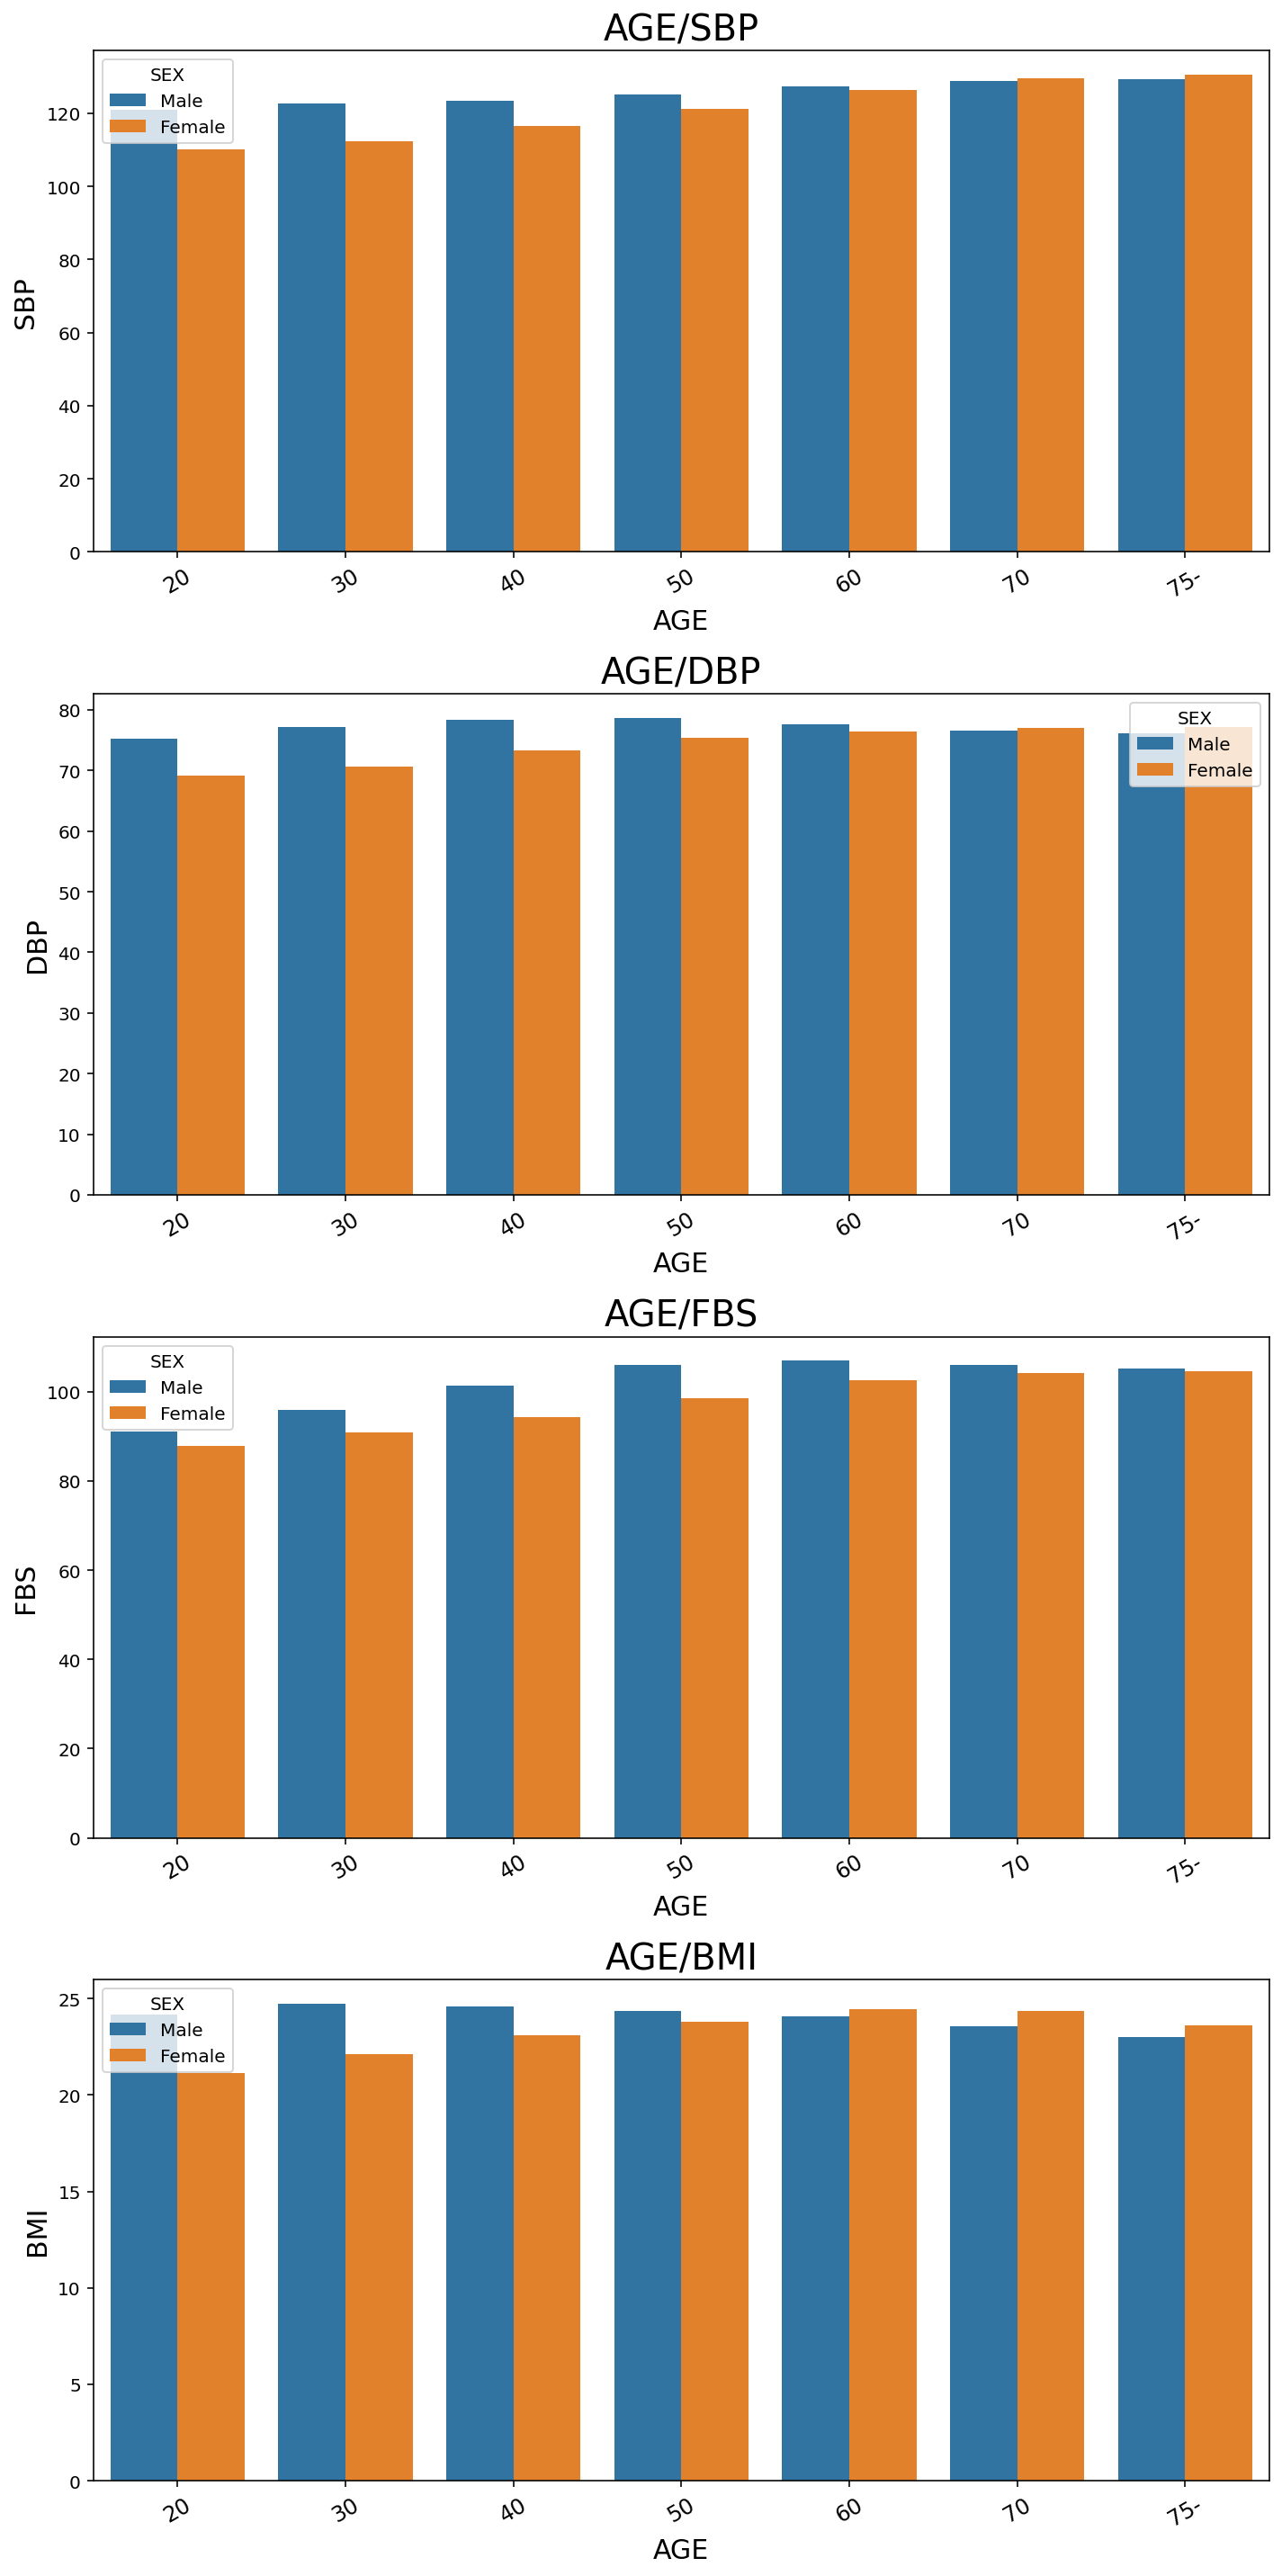

In [17]:
plt.figure(figsize=(10,20))
for i in range(len(col_list)):
  plt.subplot(4,1,i+1)
  ax = sns.barplot(data=graph_df, x='AGE', y=col_list[i], hue='SEX',ci=None)
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 30,size=12)
  ax.set_xlabel('AGE',fontsize = 15)
  ax.set_ylabel(col_list[i],fontsize = 15)
  ax.set_title(f"AGE/{col_list[i]}", fontsize = 20)
plt.tight_layout()
plt.show()

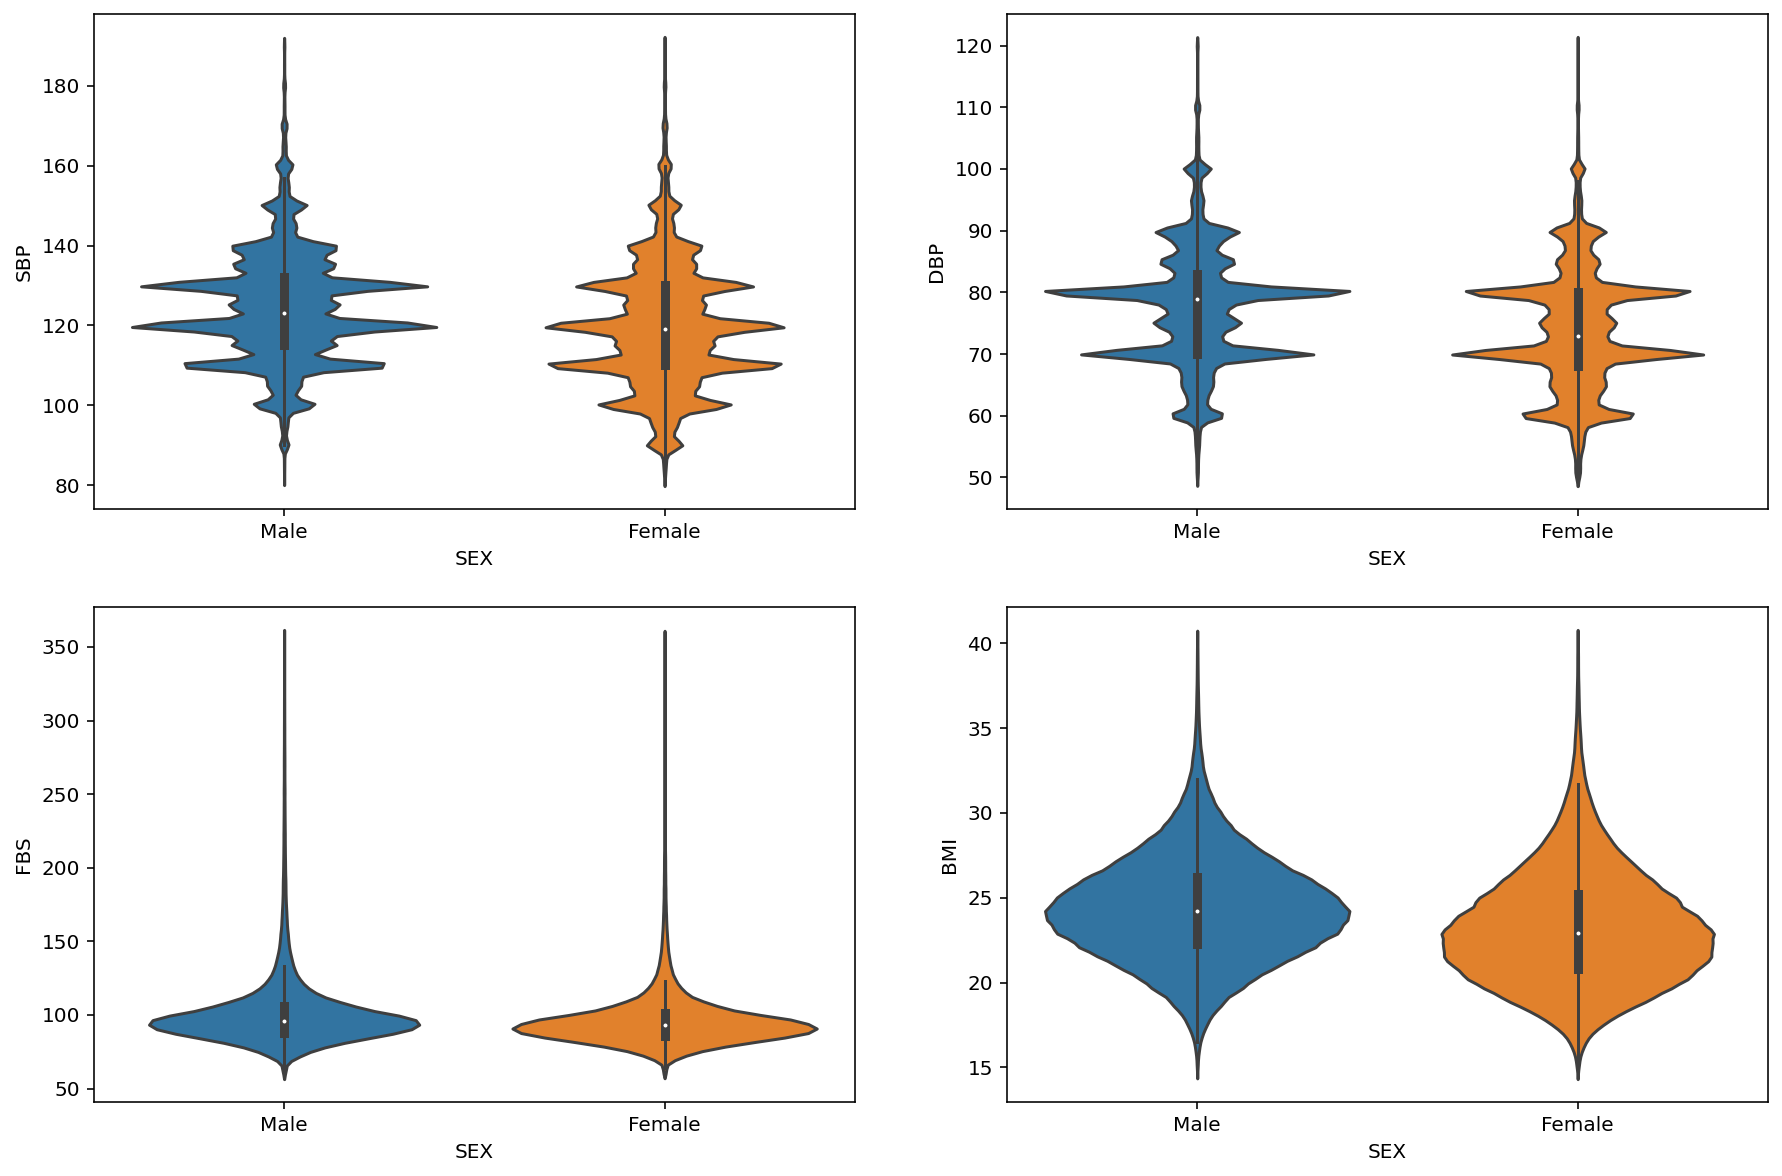

In [18]:
plt.figure(figsize=(15,10))
for i in range(len(col_list)):
  plt.subplot(2,2,i+1)
  sns.violinplot(data=graph_df,y=col_list[i],x='SEX')
plt.show()

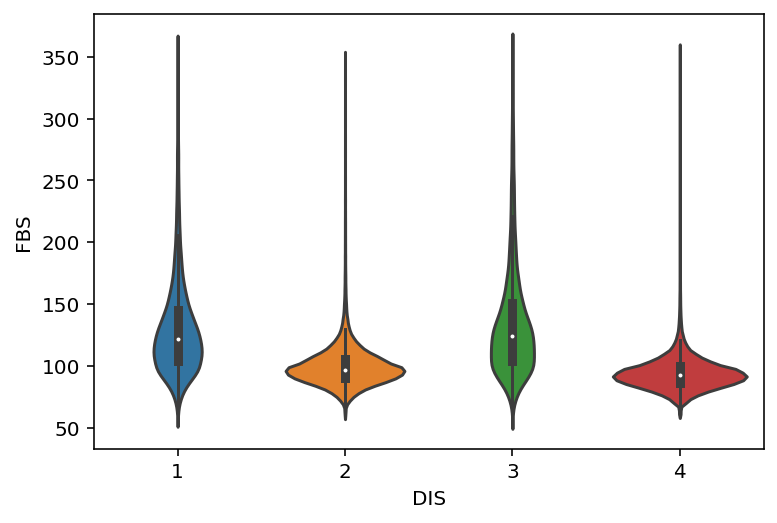

In [19]:
sns.violinplot(data=df,y='FBS',x='DIS')

## 진료내역 결과

In [20]:
DIS_item = np.sort(df['DIS'].unique())
DIS_list = []
for i in DIS_item:
  num = (df['DIS'] == i).sum()
  DIS_list.append(num)
for i in DIS_item:
  print(f"{i}: {DIS_list[i-1]}명",end=' ')
print()
print(f"총 인원 {sum(DIS_list)}명")

1: 53398명 2: 162826명 3: 43114명 4: 740662명 
총 인원 1000000명


In [21]:
DIS_item = [str(i) for i in DIS_item]
DIS_item

['1', '2', '3', '4']

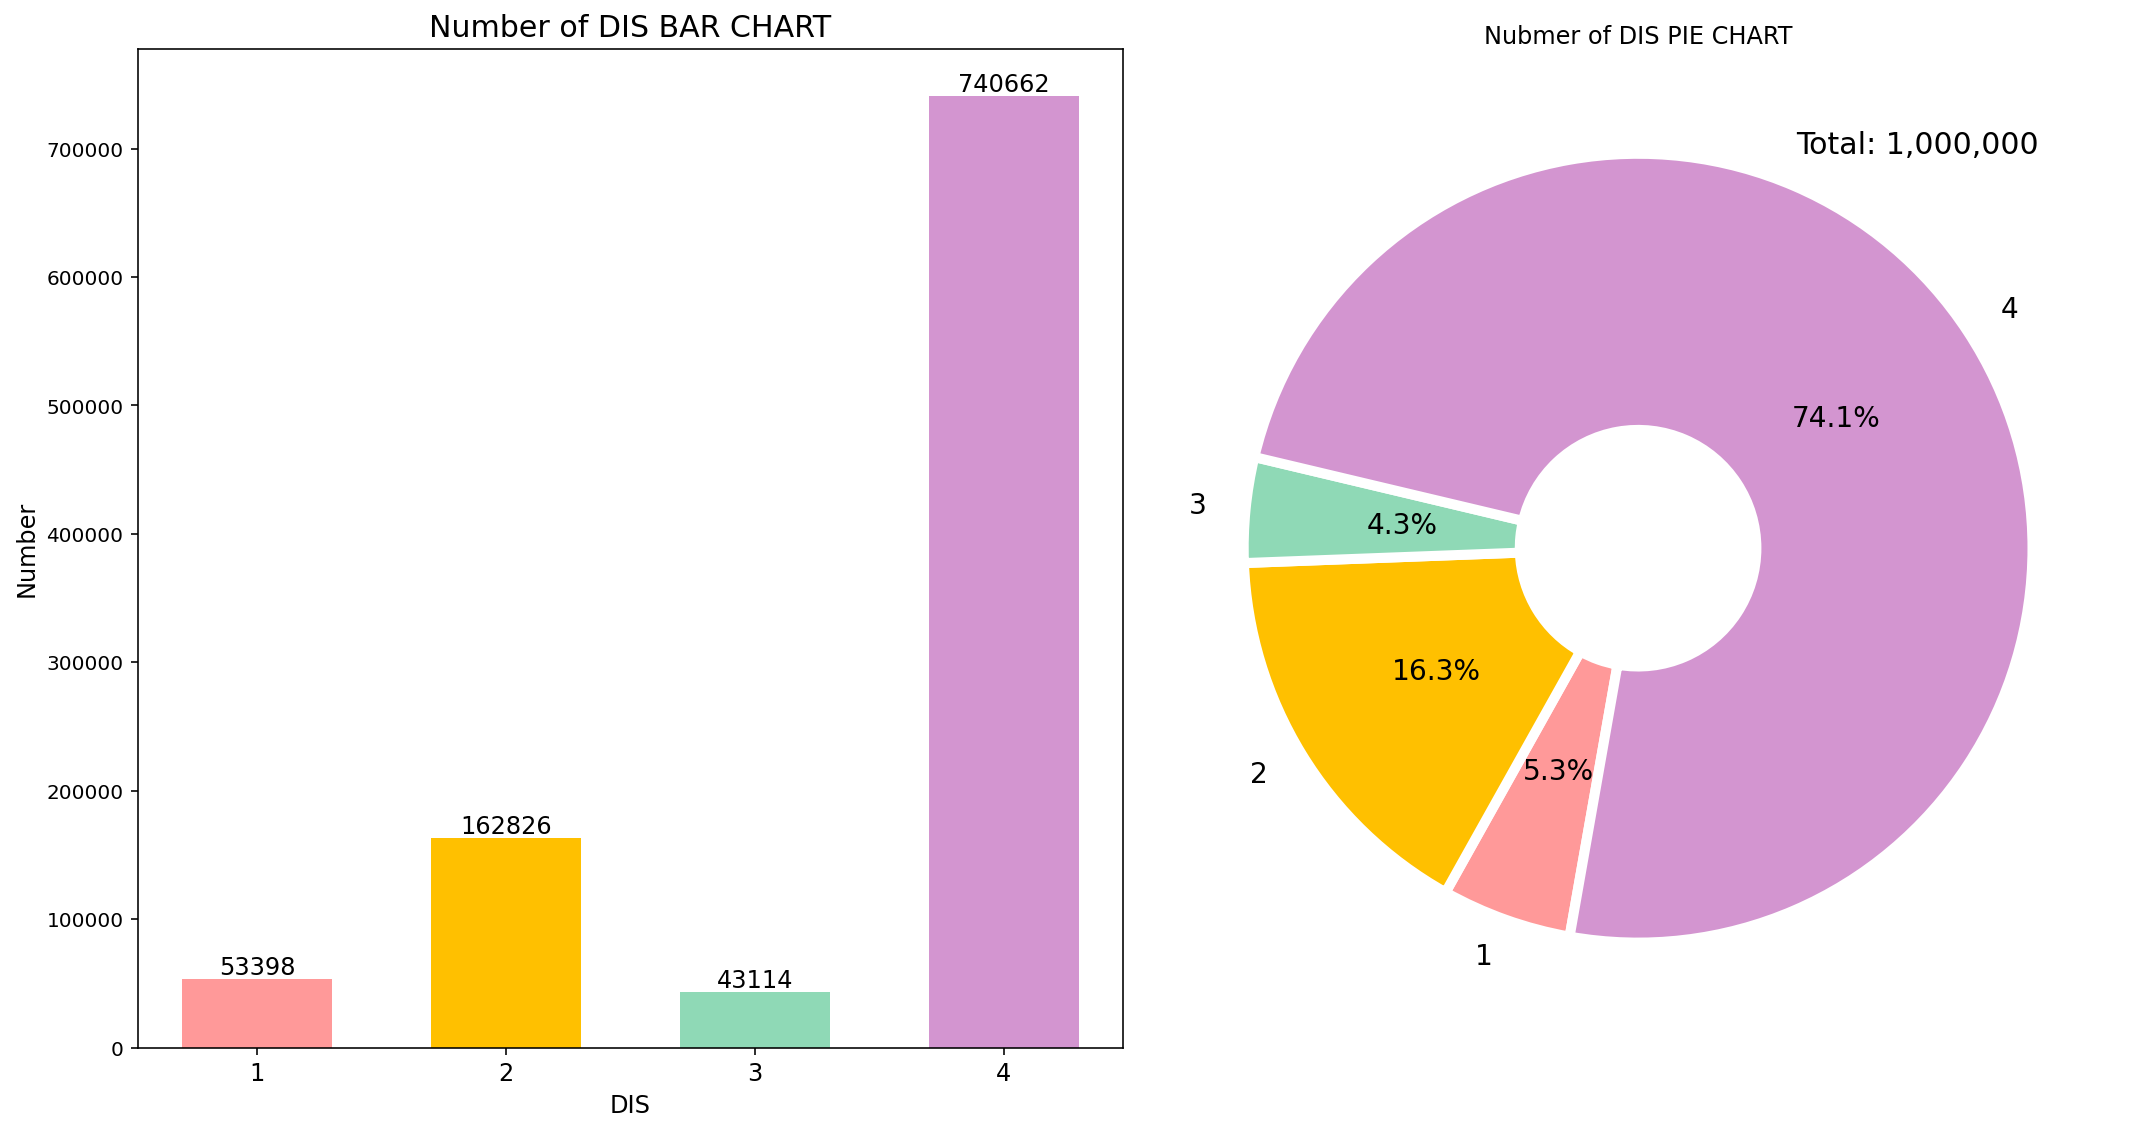

In [22]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
bar = plt.bar(DIS_item,DIS_list,color=['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'],width=0.6)
plt.xlabel('DIS', fontsize=12)
plt.ylabel('Number', fontsize=12)
plt.title('Number of DIS BAR CHART', fontsize=15)
plt.xticks(fontsize=12)
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.f' % height, ha='center', va='bottom', size = 12)
plt.subplot(1,2,2)
plt.pie(DIS_list, labels=DIS_item, autopct='%.1f%%', startangle=260, counterclock=False, colors=['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}, textprops={"fontsize" : 14 })
plt.yticks(fontsize=16)
plt.title("Nubmer of DIS PIE CHART")
plt.text(0.4,1.0,'Total: 1,000,000', fontsize=15)
plt.tight_layout()
plt.show()

## 진료내역별 컬람간의 상관관계

### 컬럼 DIS를 모두 포함한 상관관계

In [23]:
df_corr = df.loc[:,['BTH_G','SBP','DBP','FBS','BMI']]
df_corr.corr()

,BTH_G,SBP,DBP,FBS,BMI
BTH_G,1.000000,0.275981,0.134484,0.213951,0.088089
SBP,0.275981,1.000000,0.743006,0.186501,0.304383
DBP,0.134484,0.743006,1.000000,0.138717,0.275492
FBS,0.213951,0.186501,0.138717,1.000000,0.173688
BMI,0.088089,0.304383,0.275492,0.173688,1.000000


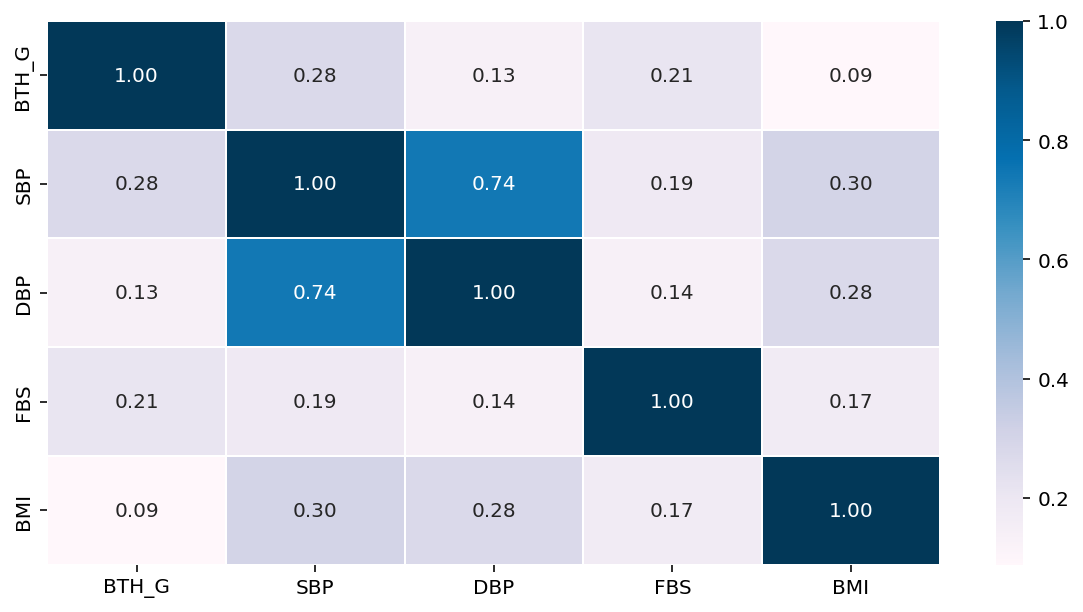

In [24]:
plt.figure(figsize=(10,5))
sns.heatmap(df_corr.corr(),linewidths=0.5 ,annot=True,cmap='PuBu', fmt = '.2f', cbar=True)
plt.show()

### 'DIS == 1' 당뇨와 고혈압 진료내역이 있는 Row

In [25]:
df1 = df.loc[(df['DIS']==1),['BTH_G','SBP','DBP','FBS','BMI']]
corr_df1 = df1.corr(method='pearson', min_periods=1)
corr_df1

,BTH_G,SBP,DBP,FBS,BMI
BTH_G,1.000000,0.071574,-0.159547,-0.156905,-0.205469
SBP,0.071574,1.000000,0.631517,0.051611,0.096677
DBP,-0.159547,0.631517,1.000000,0.066167,0.140628
FBS,-0.156905,0.051611,0.066167,1.000000,0.050806
BMI,-0.205469,0.096677,0.140628,0.050806,1.000000


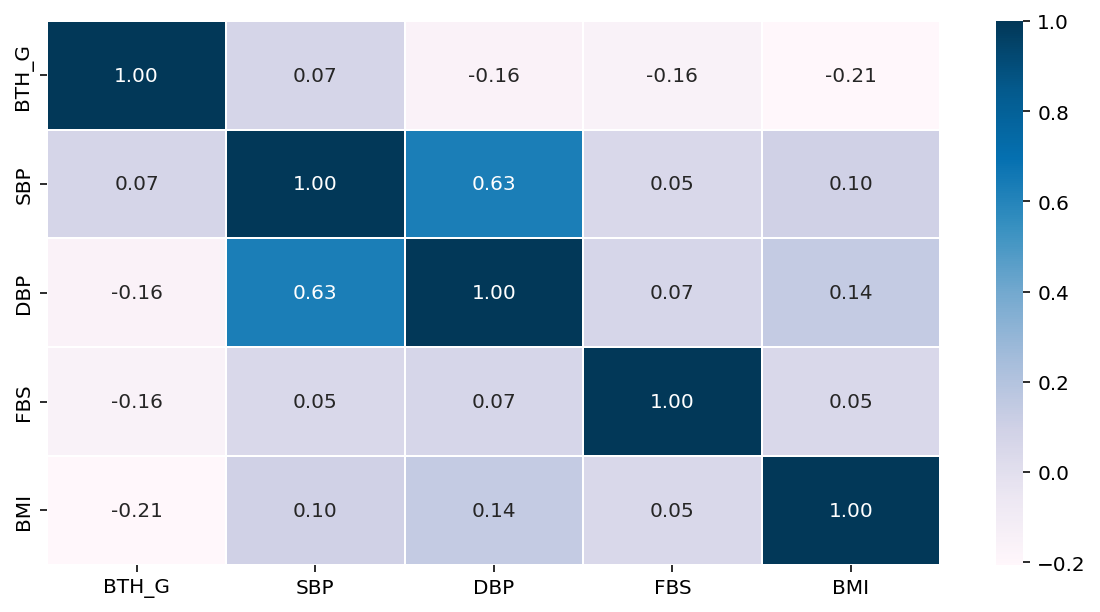

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df1,linewidths=0.5 ,annot=True,cmap='PuBu', fmt = '.2f', cbar=True)
plt.show()

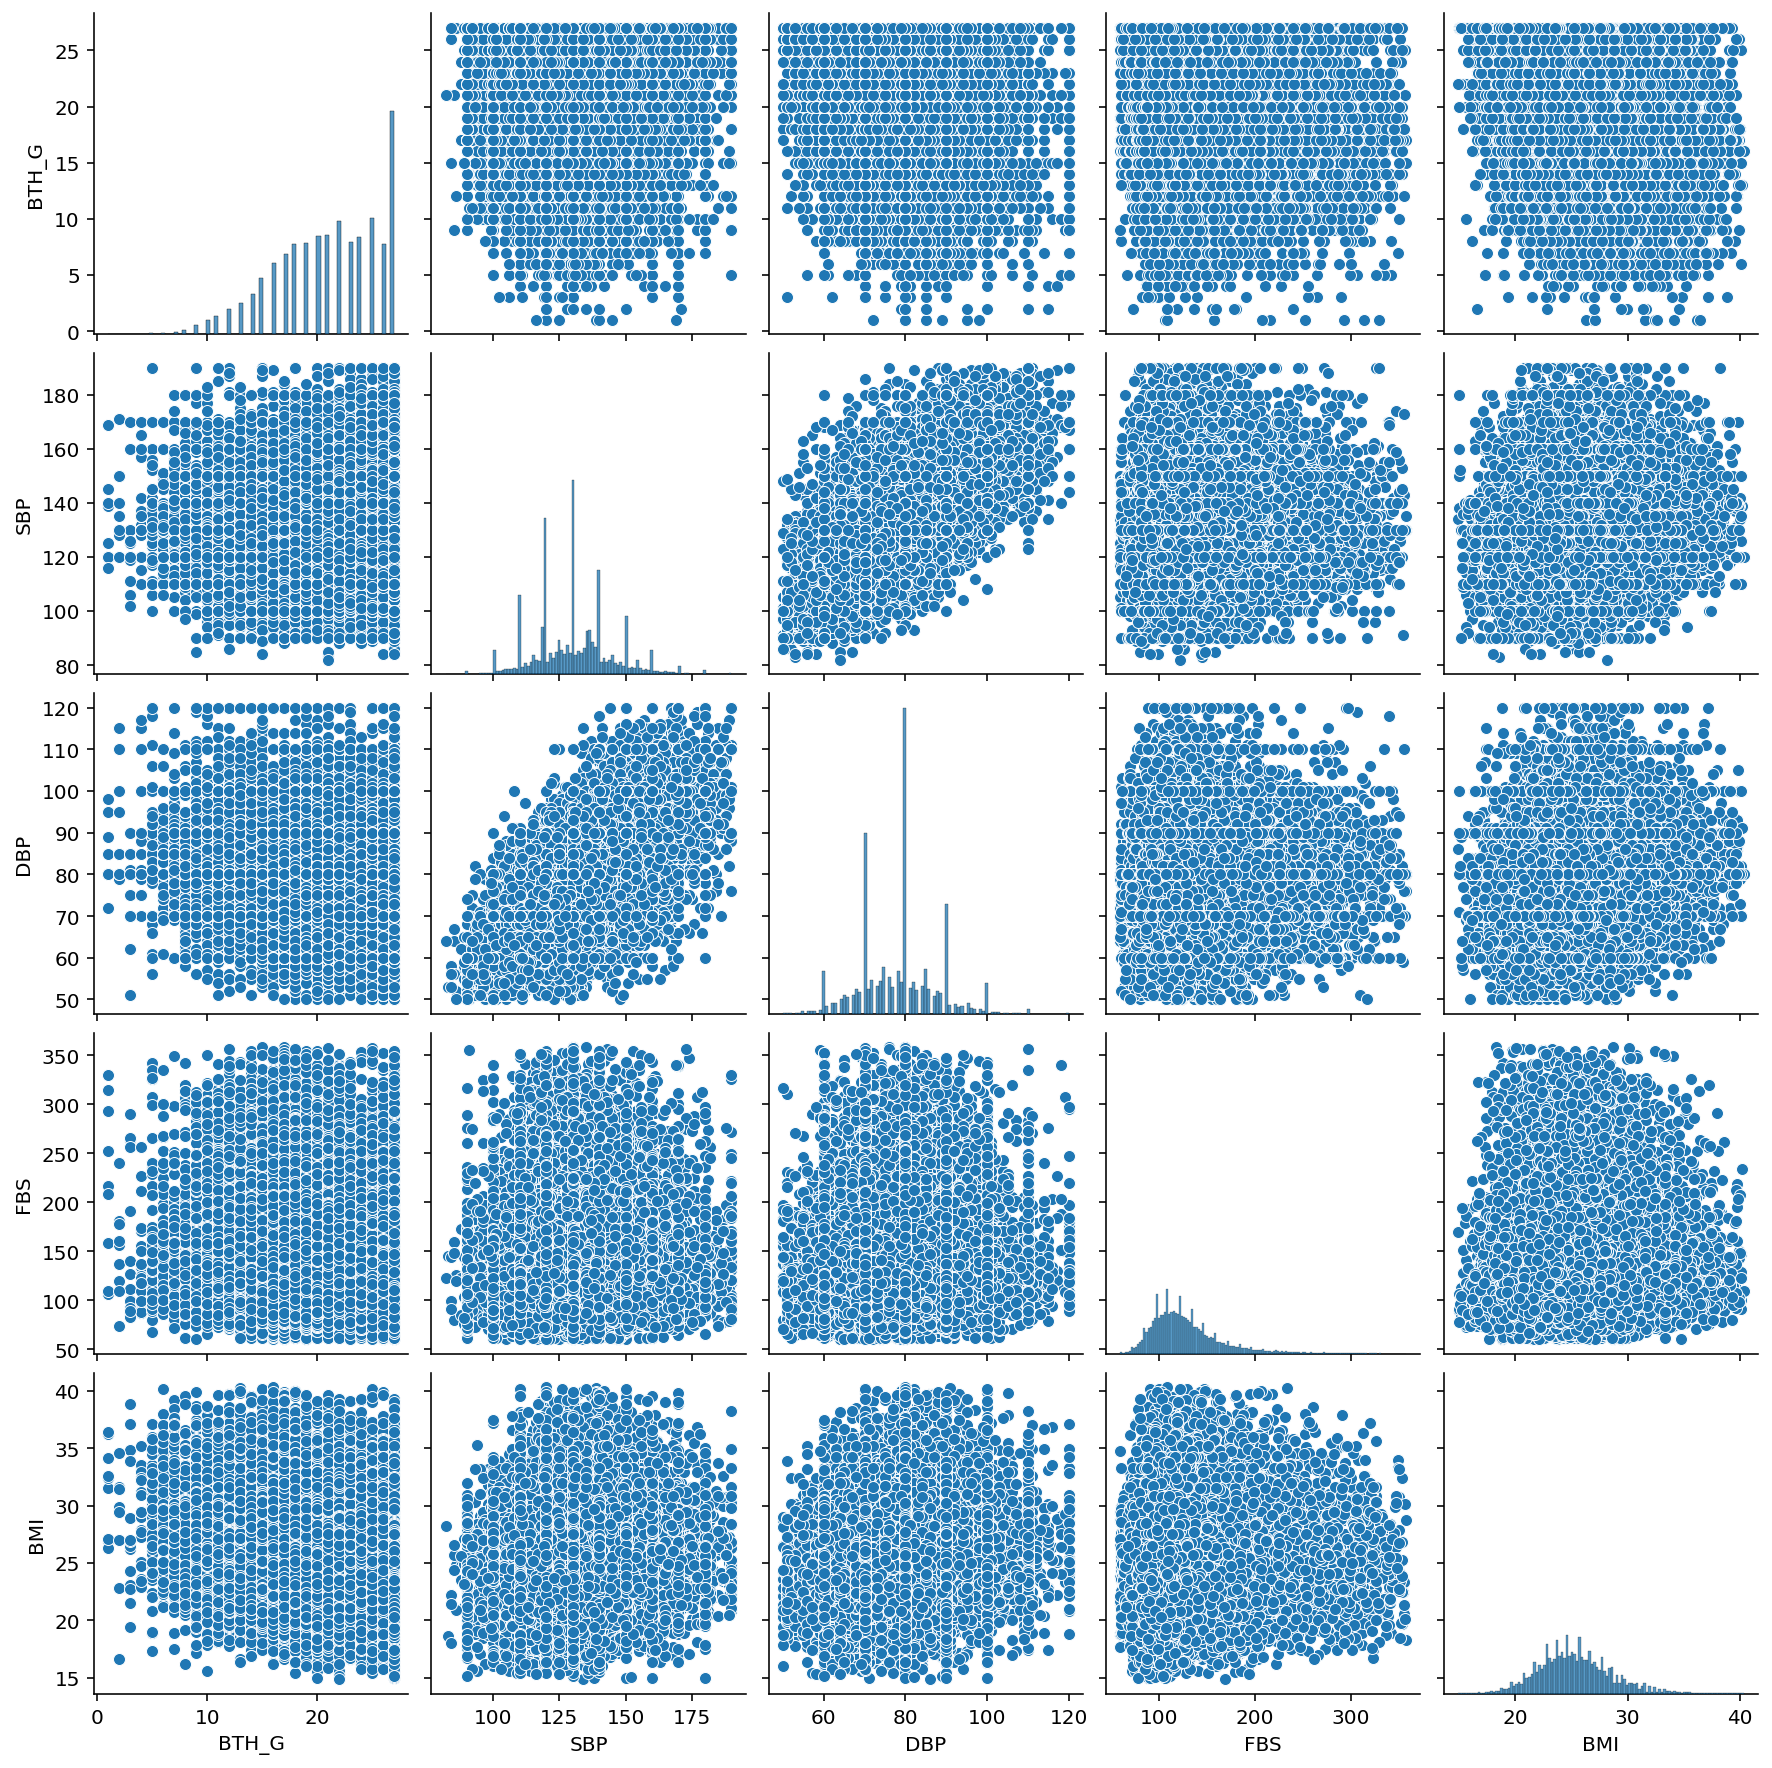

In [27]:
sns.pairplot(df1)
plt.show()

### 'DIS == 2' 고혈압 진료내역이 있는 Row

In [28]:
df2 = df.loc[(df['DIS']==2),['BTH_G','SBP','DBP','FBS','BMI']]
corr_df2 = df2.corr(method='pearson', min_periods=1)
corr_df2

,BTH_G,SBP,DBP,FBS,BMI
BTH_G,1.000000,0.044891,-0.174382,0.005172,-0.182036
SBP,0.044891,1.000000,0.672440,0.071735,0.092250
DBP,-0.174382,0.672440,1.000000,0.052032,0.113166
FBS,0.005172,0.071735,0.052032,1.000000,0.116109
BMI,-0.182036,0.092250,0.113166,0.116109,1.000000


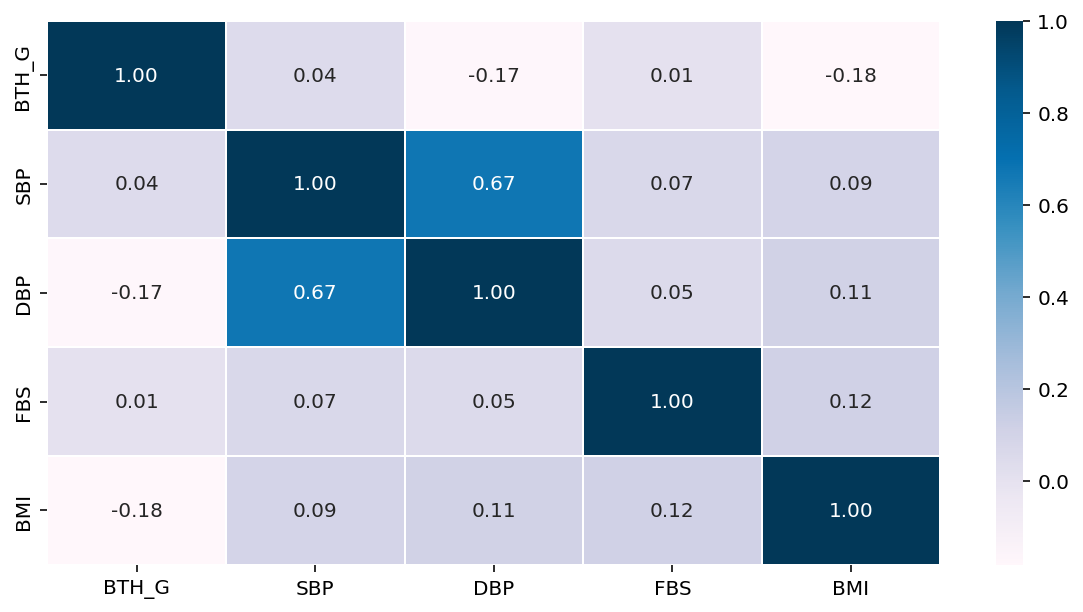

In [29]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df2,linewidths=0.5 ,annot=True,cmap='PuBu', fmt = '.2f', cbar=True)
plt.show()

### 'DIS == 3' 당뇨 진료내역이 있는 Row

In [30]:
df3 = df.loc[(df['DIS']==3),['BTH_G','SBP','DBP','FBS','BMI']]
corr_df3 = df3.corr(method='pearson', min_periods=1)
corr_df3

,BTH_G,SBP,DBP,FBS,BMI
BTH_G,1.000000,0.133782,-0.078505,-0.141598,-0.143666
SBP,0.133782,1.000000,0.671558,0.055896,0.191048
DBP,-0.078505,0.671558,1.000000,0.085898,0.196146
FBS,-0.141598,0.055896,0.085898,1.000000,0.059556
BMI,-0.143666,0.191048,0.196146,0.059556,1.000000


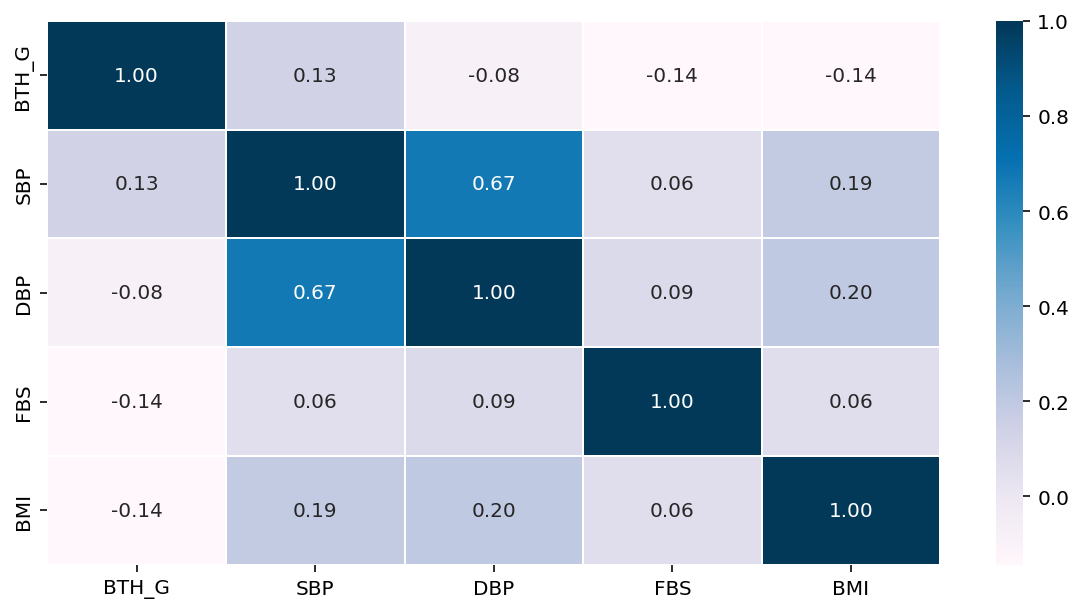

In [31]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df3,linewidths=0.5 ,annot=True,cmap='PuBu', fmt = '.2f', cbar=True)
plt.show()

### 'DIS == 4' 당뇨와 고혈압 진료내역이 없는 Row

In [32]:
df4 = df.loc[(df['DIS']==4),['BTH_G','SBP','DBP','FBS','BMI']]
corr_df4 = df4.corr(method='pearson', min_periods=1)
corr_df4

,BTH_G,SBP,DBP,FBS,BMI
BTH_G,1.000000,0.178344,0.105961,0.154200,0.036989
SBP,0.178344,1.000000,0.757605,0.189577,0.317498
DBP,0.105961,0.757605,1.000000,0.167972,0.287681
FBS,0.154200,0.189577,0.167972,1.000000,0.180236
BMI,0.036989,0.317498,0.287681,0.180236,1.000000


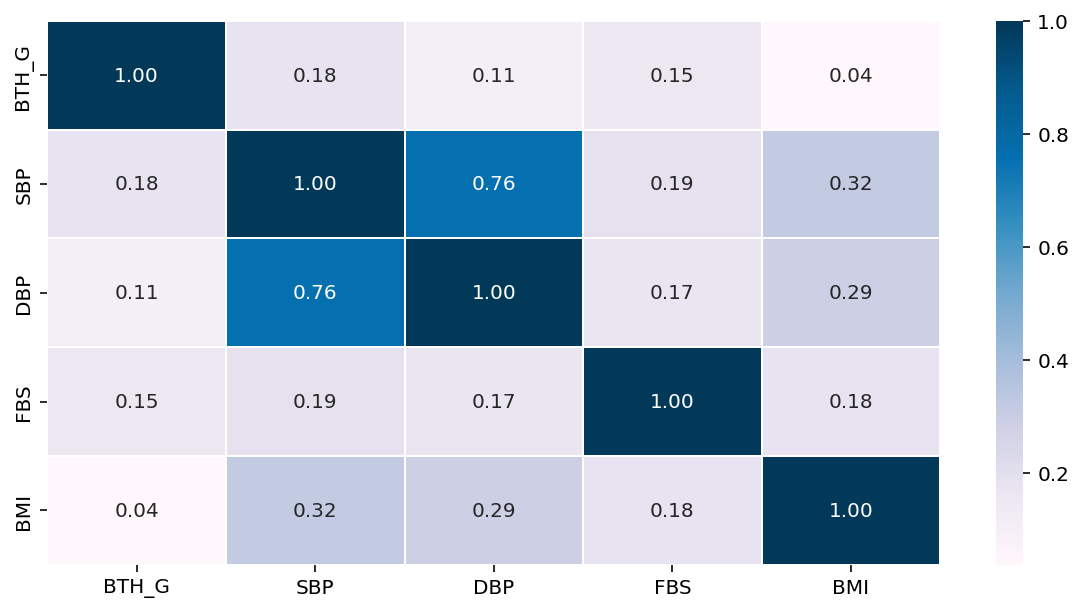

In [33]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df4,linewidths=0.5 ,annot=True,cmap='PuBu', fmt = '.2f', cbar=True)
plt.show()